In [2]:
import pandas as pd 
ratings_file ='../../data/processed/amazon_all_beauty/ratings.csv'
df = pd.read_csv(ratings_file)
df.head()



,userId,itemId,rating,timestamp
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,B00YQ6X8EO,5.0,1.588688e+09
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,B081TJ8YS3,4.0,1.588616e+09
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,B07PNNCSP9,5.0,1.589665e+09
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,B09JS339BZ,1.0,1.643394e+09
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,B08BZ63GMJ,5.0,1.609323e+09


In [3]:
df.isnull().sum()

userId       0
itemId       0
rating       0
timestamp    0
dtype: int64

In [4]:
df.describe()


,rating,timestamp
count,694252.000000,6.942520e+05
mean,3.960892,1.554762e+09
std,1.493950,8.004244e+07
min,1.000000,9.730527e+08
25%,3.000000,1.501612e+09
50%,5.000000,1.571538e+09
75%,5.000000,1.614636e+09
max,5.000000,1.694220e+09


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694252 entries, 0 to 694251
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     694252 non-null  object 
 1   itemId     694252 non-null  object 
 2   rating     694252 non-null  float64
 3   timestamp  694252 non-null  float64
dtypes: float64(2), object(2)
memory usage: 21.2+ MB


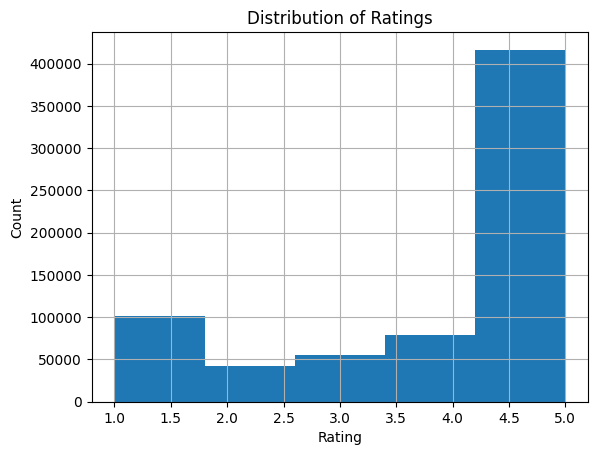

In [6]:
import matplotlib.pyplot as plt 
df['rating'].hist(bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [7]:
user_rating_counts = df['userId'].value_counts()
# Display the top 10 users by number of ratings
print("Top 10 users by number of ratings:")
print(user_rating_counts.head(10))
# Get a statistical summary of the user rating counts
print("\\nSummary of user rating counts:")
print(user_rating_counts.describe())


Top 10 users by number of ratings:
userId
AG73BVBKUOH22USSFJA5ZWL7AKXA      165
AEZP6Z2C5AVQDZAJECQYZWQRNG3Q      146
AEMP3A7IKW37CMWFXNKXWW6HGJHA_1    115
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1     87
AFDYIK3FNPY2JFBQYUWC6GSBMIRQ_2     83
AFXF3EGQTQDXMRLDWFU7UBFQZB7Q       81
AEJU3Z6HDAERETMYI2CXBQVPPDFA       79
AHY2TURQPNIDXZGH2CMQLZ343YMQ       69
AEOK4TQIKGO23SJKZ6PW4FETNNDA_1     68
AEAXAJACFMXIAAH4WOHRMXPSZWFA       65
Name: count, dtype: int64
\nSummary of user rating counts:
count    631986.000000
mean          1.098524
std           0.728334
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         165.000000
Name: count, dtype: float64


In [8]:
item_rating_counts = df['itemId'].value_counts()
# Display the top 10 items by number of ratings
print("Top 10 items by number of ratings:")
print(item_rating_counts.head(10))
# Get a statistical summary of the item rating counts
print("\\nSummary of item rating counts:")
print(item_rating_counts.describe())


Top 10 items by number of ratings:
itemId
B007IAE5WY    1952
B00EEN2HCS    1726
B07C533XCW    1500
B00R1TAN7I    1362
B08L5KN7X4    1328
B019GBG0IE    1319
B0719KWG8H    1160
B0092MCQZ4    1123
B0107QYW14    1105
B0070Z7KME     923
Name: count, dtype: int64
\nSummary of item rating counts:
count    115709.000000
mean          5.999983
std          23.169142
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1952.000000
Name: count, dtype: float64


In [9]:
user_rating_counts = df['userId'].value_counts()
print(user_rating_counts.describe())

count    631986.000000
mean          1.098524
std           0.728334
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         165.000000
Name: count, dtype: float64


In [10]:
item_rating_counts = df['itemId'].value_counts()
print(item_rating_counts.describe())



count    115709.000000
mean          5.999983
std          23.169142
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1952.000000
Name: count, dtype: float64


In [12]:
min_user_ratings=5
user_counts=df['userId'].value_counts()
active_users=user_counts[user_counts >= min_user_ratings].index
df_filtered_users=df[df['userId'].isin(active_users)]

min_item_ratings=5
item_counts=df_filtered_users['itemId'].value_counts()
popular_items=item_counts[item_counts >= min_item_ratings].index
df_final=df_filtered_users[df_filtered_users['itemId'].isin(popular_items)]
print("Original df shape:", df.shape) 
print("shape after filtering users:", df_filtered_users.shape)
print("shape after filtereing items:", df_final.shape)

Original df shape: (694252, 4)
shape after filtering users: (14008, 4)
shape after filtereing items: (5345, 4)


In [13]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_final, test_size=0.2, random_state=42)
print("training set shape:", train_df.shape)
print("test set shaape:", test_df.shape)

training set shape: (4276, 4)
test set shaape: (1069, 4)


In [15]:
import implicit
from scipy.sparse import coo_matrix
import pandas as pd
 # Assuming 'train_df' is your training DataFrame
train_df['userId_cat'] = train_df['userId'].astype('category').cat.codes
train_df['itemId_cat'] = train_df['itemId'].astype('category').cat.codes # Corrected typo here

 # Corrected typo in the next line from userID_cat to userId_cat
user_item_matrix = coo_matrix((train_df['rating'].astype(float), (train_df['userId_cat'],
      train_df['itemId_cat'])))

model = implicit.als.AlternatingLeastSquares(factors=50)
model.fit(user_item_matrix)

print("Model training complete!")

/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0012264251708984375 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Model training complete!


In [16]:

from implicit.evaluation import precision_at_k
from scipy.sparse import coo_matrix
import pandas as pd
# Create a dictionary for user and item mappings from the training data
user_map = dict(zip(train_df['userId'], train_df['userId_cat']))
item_map = dict(zip(train_df['itemId'], train_df['itemId_cat']))

# Map the test data using the training data mappings
test_df['userId_cat'] = test_df['userId'].map(user_map)
test_df['itemId_cat'] = test_df['itemId'].map(item_map)

 # Remove users/items from the test set that are not in the training set
test_df_filtered = test_df.dropna(subset=['userId_cat', 'itemId_cat'])
 # Create the test user-item matrix
  # Ensure the shape of the test matrix is the same as the training matrix
test_user_item_matrix = coo_matrix((test_df_filtered['rating'].astype(float),
                                    (test_df_filtered['userId_cat'].astype(int),
                                    test_df_filtered['itemId_cat'].astype(int))),
                                    shape=user_item_matrix.shape)

# Convert matrices to CSR format, which is required by the evaluation function
train_csr = user_item_matrix.tocsr()
test_csr = test_user_item_matrix.tocsr()

# Calculate Precision@10
# This function calculates the precision at K for each user and returns the mean
p_at_k = precision_at_k(model, train_user_items=train_csr, test_user_items=test_csr, K=10)

print(f"Mean Precision@10: {p_at_k}")

  0%|          | 0/476 [00:00<?, ?it/s]

Mean Precision@10: 0.0631163708086785


In [18]:
import joblib 
import os
model_dir='saved_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_filename=os.path.join(model_dir, 'al_mode_v1.joblib')
joblib.dump(model, model_filename)
print(f"model saved to {model_filename}")


model saved to saved_models/al_mode_v1.joblib


In [19]:
import pandas as pd

# Create mappings from categorical codes back to original IDs
# This helps in interpreting the model's output
user_cat_to_id = dict(zip(train_df['userId_cat'], train_df['userId']))
item_cat_to_id = dict(zip(train_df['itemId_cat'], train_df['itemId']))

def inspect_recommendations_for_user(user_id, num_recs=10):
    """
    Inspects the recommendations for a given user ID.
    """
    print(f"Inspecting recommendations for user: {user_id}\n")

    # --- Get user's history ---
    train_items = train_df[train_df['userId'] == user_id]['itemId'].tolist()
    test_items = test_df[test_df['userId'] == user_id]['itemId'].tolist()

    print("--- User History ---")
    print(f"Items in training set ({len(train_items)}): {train_items}")
    print(f"Items in test set ({len(test_items)}): {test_items}")
    print("---------------------\n")


    # --- Get Recommendations ---
    # Get the user's categorical code
    try:
        user_cat = train_df[train_df['userId'] == user_id]['userId_cat'].iloc[0]
    except IndexError:
        print("User not found in the training set.")
        return

    # Get top N recommendations from the model
    train_user_item_matrix_csr = user_item_matrix.tocsr()
    recommended_item_cats, scores = model.recommend(user_cat, train_user_item_matrix_csr[user_cat], N=num_recs)

    # Convert recommended item codes to original IDs
    recommended_item_ids = [item_cat_to_id[i] for i in recommended_item_cats]

    print(f"--- Top {num_recs} Recommendations ---")
    for i, item_id in enumerate(recommended_item_ids):
        print(f"  {i+1}. {item_id} (Score: {scores[i]:.4f})")
    print("--------------------------------\n")


    # --- Check for Hits ---
    hits = set(recommended_item_ids) & set(test_items)
    print(f"--- Hits in Test Set ({len(hits)}) ---")
    for item in hits:
        print(f"  - {item}")
    print("---------------------------\n\n")


# --- Example Usage ---
# Get a random user from the test set to inspect
random_user_id = test_df['userId'].sample(1).iloc[0]

# Get recommendations for the random user
inspect_recommendations_for_user(random_user_id)

Inspecting recommendations for user: AHPG65LKS3QKRWDUWAKZNLEK5RZQ

--- User History ---
Items in training set (20): ['B0977LVHF8', 'B08DNCR582', 'B09GGVH7RQ', 'B08W2HG4BD', 'B07PBWVV5K', 'B08PVH18Z6', 'B08QVJ4NVD', 'B089D16BWJ', 'B08ZS8RLM8', 'B08DK5D9J5', 'B0994HWXVV', 'B08HDG9F44', 'B08K2V6WGH', 'B095C1WF44', 'B08YZ3854D', 'B086Q2J3F2', 'B087J3H22J', 'B08MT8L5ZL', 'B08NTD1NM1', 'B08GMC48QF']
Items in test set (9): ['B08VNP9MKF', 'B07T4LKC4D', 'B08N5NDVGH', 'B0895XPZNT', 'B09C5NH4NW', 'B09HGVRZCS', 'B086N2SY91', 'B07YV9J2YZ', 'B084WP4XS8']
---------------------

--- Top 10 Recommendations ---
  1. B086N2SY91 (Score: 0.6910)
  2. B09C5NH4NW (Score: 0.6732)
  3. B09HGVRZCS (Score: 0.6379)
  4. B08VNP9MKF (Score: 0.6222)
  5. B07T4LKC4D (Score: 0.5748)
  6. B07YV9J2YZ (Score: 0.5076)
  7. B07P88S8SV (Score: 0.3708)
  8. B09LWV3HH2 (Score: 0.3640)
  9. B08CXPSYWX (Score: 0.3503)
  10. B08LZ6W8RF (Score: 0.3400)
--------------------------------

--- Hits in Test Set (6) ---
  - B09HGVRZCS


--- Aggregate Results for 469 users ---
Mean Precision@10:   0.0132
Median Precision@10: 0.0000
Standard Deviation:  0.0488
Min Precision@10:    0.0000
Max Precision@10:    0.6000
------------------------------------


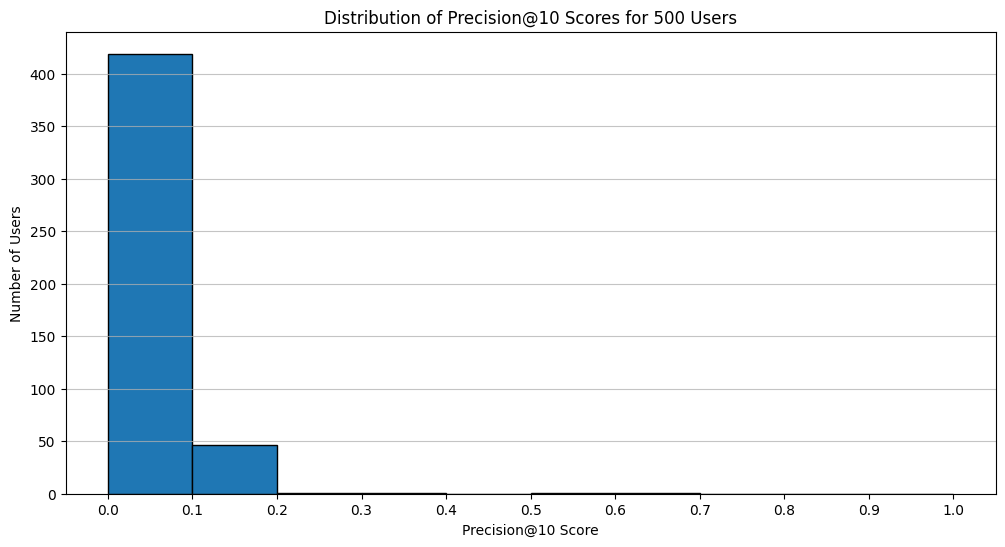

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Settings ---
num_users_to_test = 500

# --- Get a sample of users from the test set ---
test_users = test_df['userId'].unique()
if len(test_users) > num_users_to_test:
    sample_users = np.random.choice(test_users, size=num_users_to_test, replace=False)
else:
    sample_users = test_users

# --- Initialize list to store precision scores ---
precisions = []

# --- Get mappings and training matrix ---
user_map = dict(zip(train_df['userId'], train_df['userId_cat']))
item_cat_to_id = dict(zip(train_df['itemId_cat'], train_df['itemId']))
train_user_item_matrix_csr = user_item_matrix.tocsr()

# --- Loop through the sample users ---
for user_id in sample_users:
    # Get user's categorical code
    if user_id not in user_map:
        continue # Skip users in test set but not in training set
    user_cat = user_map[user_id]

    # Get recommendations
    recommended_item_cats, scores = model.recommend(user_cat, train_user_item_matrix_csr[user_cat], N=10)
    recommended_item_ids = [item_cat_to_id[i] for i in recommended_item_cats]

    # Get actual items from the test set
    actual_items = test_df[test_df['userId'] == user_id]['itemId'].tolist()

    # Calculate hits and precision
    hits = len(set(recommended_item_ids) & set(actual_items))
    precision = hits / 10.0
    precisions.append(precision)

# --- Display Aggregate Results ---
print(f"--- Aggregate Results for {len(precisions)} users ---")
if precisions:
    print(f"Mean Precision@10:   {np.mean(precisions):.4f}")
    print(f"Median Precision@10: {np.median(precisions):.4f}")
    print(f"Standard Deviation:  {np.std(precisions):.4f}")
    print(f"Min Precision@10:    {np.min(precisions):.4f}")
    print(f"Max Precision@10:    {np.max(precisions):.4f}")
else:
    print("No users from the sample were found in the training set.")
print("------------------------------------")

# --- Plot a histogram of the precisions ---
if precisions:
    plt.figure(figsize=(12, 6))
    plt.hist(precisions, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], edgecolor='black')
    plt.title('Distribution of Precision@10 Scores for 500 Users')
    plt.xlabel('Precision@10 Score')
    plt.ylabel('Number of Users')
    plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.grid(axis='y', alpha=0.75)
    plt.show()

--- Aggregate Results for 476 users ---
Mean Precision@10:   0.0134
Median Precision@10: 0.0000
Standard Deviation:  0.0488
Min Precision@10:    0.0000
Max Precision@10:    0.6000
------------------------------------


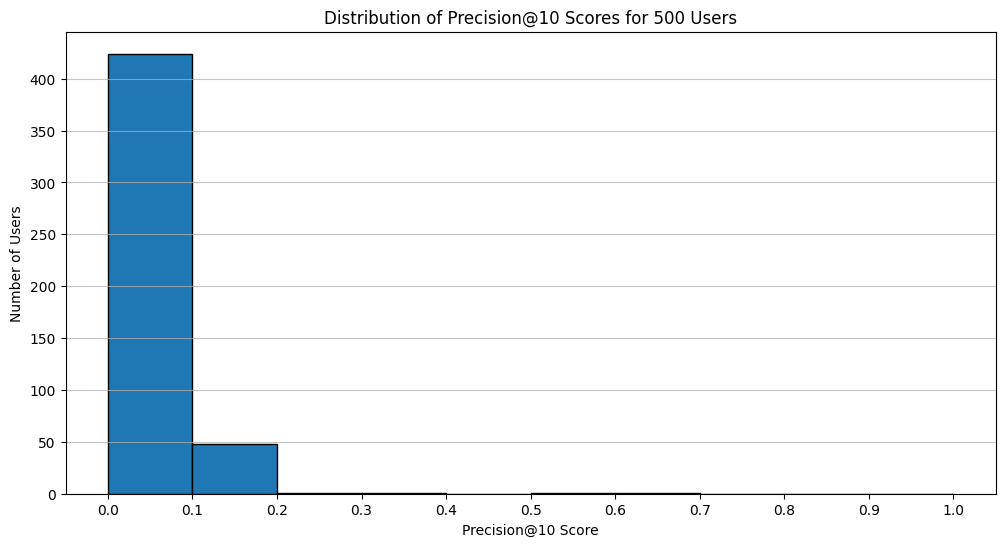

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Settings ---
num_users_to_test = 1000

# --- Get a sample of users from the test set ---
test_users = test_df['userId'].unique()
if len(test_users) > num_users_to_test:
    sample_users = np.random.choice(test_users, size=num_users_to_test, replace=False)
else:
    sample_users = test_users

# --- Initialize list to store precision scores ---
precisions = []

# --- Get mappings and training matrix ---
user_map = dict(zip(train_df['userId'], train_df['userId_cat']))
item_cat_to_id = dict(zip(train_df['itemId_cat'], train_df['itemId']))
train_user_item_matrix_csr = user_item_matrix.tocsr()

# --- Loop through the sample users ---
for user_id in sample_users:
    # Get user's categorical code
    if user_id not in user_map:
        continue # Skip users in test set but not in training set
    user_cat = user_map[user_id]

    # Get recommendations
    recommended_item_cats, scores = model.recommend(user_cat, train_user_item_matrix_csr[user_cat], N=10)
    recommended_item_ids = [item_cat_to_id[i] for i in recommended_item_cats]

    # Get actual items from the test set
    actual_items = test_df[test_df['userId'] == user_id]['itemId'].tolist()

    # Calculate hits and precision
    hits = len(set(recommended_item_ids) & set(actual_items))
    precision = hits / 10.0
    precisions.append(precision)

# --- Display Aggregate Results ---
print(f"--- Aggregate Results for {len(precisions)} users ---")
if precisions:
    print(f"Mean Precision@10:   {np.mean(precisions):.4f}")
    print(f"Median Precision@10: {np.median(precisions):.4f}")
    print(f"Standard Deviation:  {np.std(precisions):.4f}")
    print(f"Min Precision@10:    {np.min(precisions):.4f}")
    print(f"Max Precision@10:    {np.max(precisions):.4f}")
else:
    print("No users from the sample were found in the training set.")
print("------------------------------------")

# --- Plot a histogram of the precisions ---
if precisions:
    plt.figure(figsize=(12, 6))
    plt.hist(precisions, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], edgecolor='black')
    plt.title('Distribution of Precision@10 Scores for 500 Users')
    plt.xlabel('Precision@10 Score')
    plt.ylabel('Number of Users')
    plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.grid(axis='y', alpha=0.75)
    plt.show()

--- Training model with 20 factors ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0009086132049560547 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 0.27 seconds
Mean Precision@10: 0.0118
Median Precision@10: 0.0000
------------------------------------
--- Training model with 50 factors ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004215240478515625 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 0.29 seconds
Mean Precision@10: 0.0151
Median Precision@10: 0.0000
------------------------------------
--- Training model with 100 factors ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005826950073242188 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 0.80 seconds
Mean Precision@10: 0.0155
Median Precision@10: 0.0000
------------------------------------
--- Training model with 150 factors ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004413127899169922 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 1.12 seconds
Mean Precision@10: 0.0162
Median Precision@10: 0.0000
------------------------------------
--- Training model with 200 factors ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043129920959472656 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 6.11 seconds
Mean Precision@10: 0.0179
Median Precision@10: 0.0000
------------------------------------

--- Hyperparameter Tuning Results ---
   factors  mean_precision  median_precision  training_time_seconds
0       20        0.011765               0.0               0.274852
1       50        0.015126               0.0               0.293094
2      100        0.015546               0.0               0.804634
3      150        0.016176               0.0               1.117397
4      200        0.017857               0.0               6.112448


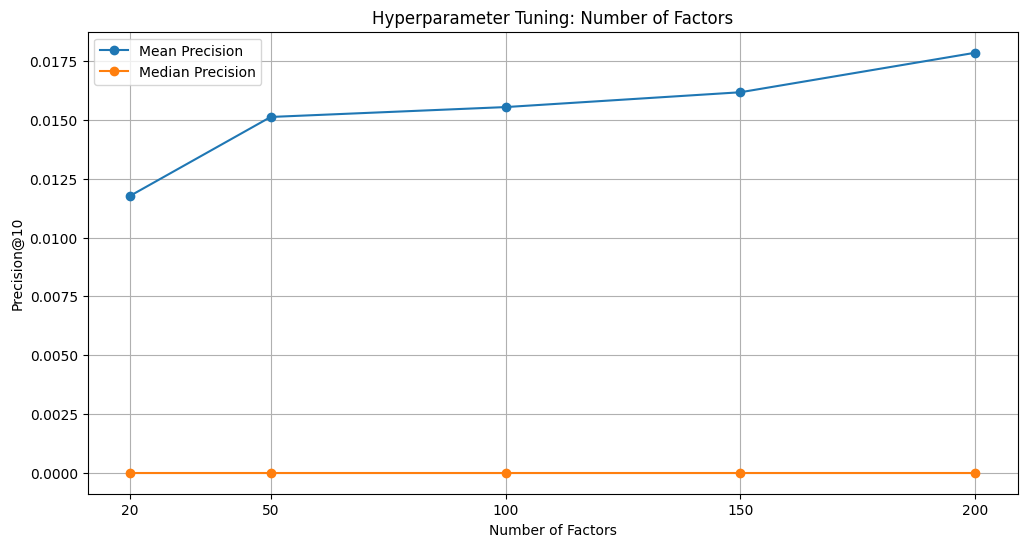

In [22]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import implicit

# --- Hyperparameters to test ---
# We'll start by tuning the number of factors
factor_values = [20, 50, 100, 150, 200]

# --- Store results ---
tuning_results = []

# --- Get the sample of users for consistent evaluation ---
num_users_to_test = 1000
test_users = test_df['userId'].unique()
if len(test_users) > num_users_to_test:
    sample_users = np.random.choice(test_users, size=num_users_to_test, replace=False)
else:
    sample_users = test_users

# --- Get mappings and training matrix ---
user_map = dict(zip(train_df['userId'], train_df['userId_cat']))
item_cat_to_id = dict(zip(train_df['itemId_cat'], train_df['itemId']))
train_user_item_matrix_csr = user_item_matrix.tocsr()


# --- Loop through the hyperparameter values ---
for factors in factor_values:
    print(f"--- Training model with {factors} factors ---")
    start_time = time.time()

    # --- 1. Train the model ---
    model = implicit.als.AlternatingLeastSquares(factors=factors, random_state=42)
    model.fit(user_item_matrix)
    training_time = time.time() - start_time
    print(f"Training time: {training_time:.2f} seconds")

    # --- 2. Evaluate the model ---
    precisions = []
    for user_id in sample_users:
        if user_id not in user_map:
            continue
        user_cat = user_map[user_id]
        recommended_item_cats, scores = model.recommend(user_cat, train_user_item_matrix_csr[user_cat], N=10)
        recommended_item_ids = [item_cat_to_id[i] for i in recommended_item_cats]
        actual_items = test_df[test_df['userId'] == user_id]['itemId'].tolist()
        hits = len(set(recommended_item_ids) & set(actual_items))
        precision = hits / 10.0
        precisions.append(precision)

    # --- 3. Store the results ---
    if precisions:
        mean_precision = np.mean(precisions)
        median_precision = np.median(precisions)
    else:
        mean_precision = 0
        median_precision = 0

    tuning_results.append({
        'factors': factors,
        'mean_precision': mean_precision,
        'median_precision': median_precision,
        'training_time_seconds': training_time
    })
    print(f"Mean Precision@10: {mean_precision:.4f}")
    print(f"Median Precision@10: {median_precision:.4f}")
    print("------------------------------------")


# --- Display Final Results ---
print("\n--- Hyperparameter Tuning Results ---")
results_df = pd.DataFrame(tuning_results)
print(results_df)

# --- Plot the results for easy comparison ---
if not results_df.empty:
    plt.figure(figsize=(12, 6))
    plt.plot(results_df['factors'], results_df['mean_precision'], marker='o', label='Mean Precision')
    plt.plot(results_df['factors'], results_df['median_precision'], marker='o', label='Median Precision')
    plt.title('Hyperparameter Tuning: Number of Factors')
    plt.xlabel('Number of Factors')
    plt.ylabel('Precision@10')
    plt.xticks(factor_values)
    plt.legend()
    plt.grid(True)
    plt.show()

--- Training model with regularization = 0.01 ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0015921592712402344 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 6.43 seconds
Mean Precision@10: 0.0179
Median Precision@10: 0.0000
------------------------------------
--- Training model with regularization = 0.1 ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042319297790527344 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 5.78 seconds
Mean Precision@10: 0.0176
Median Precision@10: 0.0000
------------------------------------
--- Training model with regularization = 1.0 ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00038909912109375 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 5.72 seconds
Mean Precision@10: 0.0174
Median Precision@10: 0.0000
------------------------------------
--- Training model with regularization = 10.0 ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004687309265136719 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 6.60 seconds
Mean Precision@10: 0.0155
Median Precision@10: 0.0000
------------------------------------
--- Training model with regularization = 100.0 ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045609474182128906 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 5.31 seconds
Mean Precision@10: 0.0046
Median Precision@10: 0.0000
------------------------------------

--- Regularization Tuning Results ---
   regularization  mean_precision  median_precision  training_time_seconds
0            0.01        0.017857               0.0               6.427993
1            0.10        0.017647               0.0               5.777408
2            1.00        0.017437               0.0               5.724759
3           10.00        0.015546               0.0               6.604615
4          100.00        0.004622               0.0               5.314219


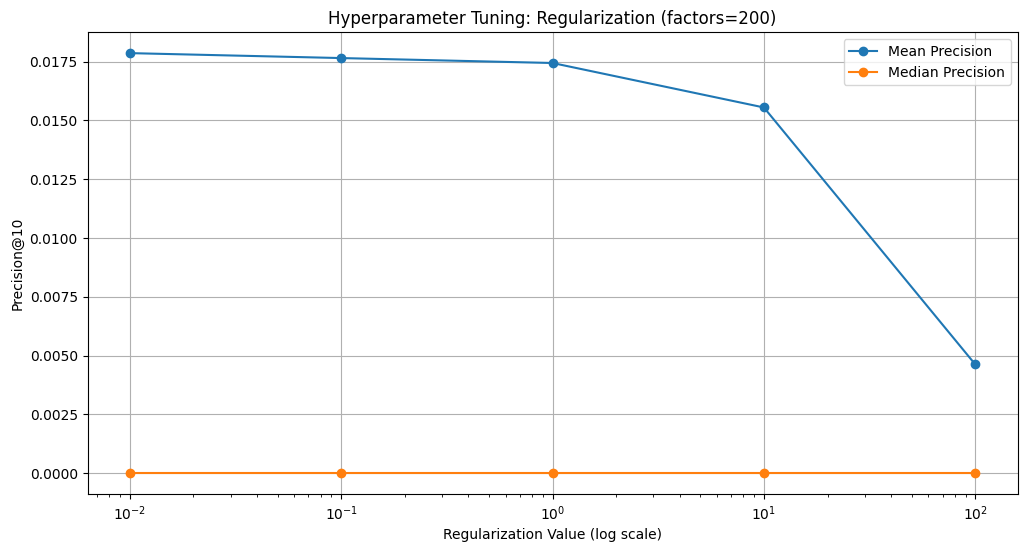

In [23]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import implicit

# --- Hyperparameters to test ---
# We'll fix factors=200 and tune the regularization parameter
regularization_values = [0.01, 0.1, 1.0, 10.0, 100.0]

# --- Store results ---
reg_tuning_results = []

# (Assuming sample_users, user_map, etc. are still in memory from the last run)

# --- Loop through the hyperparameter values ---
for regularization in regularization_values:
    print(f"--- Training model with regularization = {regularization} ---")
    start_time = time.time()

    # --- 1. Train the model ---
    model = implicit.als.AlternatingLeastSquares(factors=200, regularization=regularization, random_state=42)
    model.fit(user_item_matrix)
    training_time = time.time() - start_time
    print(f"Training time: {training_time:.2f} seconds")

    # --- 2. Evaluate the model ---
    precisions = []
    for user_id in sample_users:
        if user_id not in user_map:
            continue
        user_cat = user_map[user_id]
        recommended_item_cats, scores = model.recommend(user_cat, train_user_item_matrix_csr[user_cat], N=10)
        recommended_item_ids = [item_cat_to_id[i] for i in recommended_item_cats]
        actual_items = test_df[test_df['userId'] == user_id]['itemId'].tolist()
        hits = len(set(recommended_item_ids) & set(actual_items))
        precision = hits / 10.0
        precisions.append(precision)

    # --- 3. Store the results ---
    if precisions:
        mean_precision = np.mean(precisions)
        median_precision = np.median(precisions)
    else:
        mean_precision = 0
        median_precision = 0

    reg_tuning_results.append({
        'regularization': regularization,
        'mean_precision': mean_precision,
        'median_precision': median_precision,
        'training_time_seconds': training_time
    })
    print(f"Mean Precision@10: {mean_precision:.4f}")
    print(f"Median Precision@10: {median_precision:.4f}")
    print("------------------------------------")


# --- Display Final Results ---
print("\n--- Regularization Tuning Results ---")
reg_results_df = pd.DataFrame(reg_tuning_results)
print(reg_results_df)

# --- Plot the results for easy comparison ---
if not reg_results_df.empty:
    plt.figure(figsize=(12, 6))
    plt.plot(reg_results_df['regularization'], reg_results_df['mean_precision'], marker='o', label='Mean Precision')
    plt.plot(reg_results_df['regularization'], reg_results_df['median_precision'], marker='o', label='Median Precision')
    plt.title('Hyperparameter Tuning: Regularization (factors=200)')
    plt.xlabel('Regularization Value (log scale)')
    plt.ylabel('Precision@10')
    plt.xscale('log') # Use a log scale for the x-axis for better visualization
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import implicit

# --- Try a new model: Bayesian Personalized Ranking (BPR) ---

print("--- Training BPR model ---")
start_time = time.time()

# --- 1. Train the BPR model ---
# We'll use the same number of factors as our best ALS model
bpr_model = implicit.bpr.BayesianPersonalizedRanking(factors=200, random_state=42)

# BPR uses the same user-item matrix
bpr_model.fit(user_item_matrix)

training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")


# --- 2. Evaluate the BPR model ---
# We use the exact same evaluation logic for a fair comparison
precisions = []
for user_id in sample_users:
    if user_id not in user_map:
        continue
    user_cat = user_map[user_id]

    # Use the BPR model to get recommendations
    recommended_item_cats, scores = bpr_model.recommend(user_cat, train_user_item_matrix_csr[user_cat], N=10)
    recommended_item_ids = [item_cat_to_id[i] for i in recommended_item_cats]

    actual_items = test_df[test_df['userId'] == user_id]['itemId'].tolist()
    hits = len(set(recommended_item_ids) & set(actual_items))
    precision = hits / 10.0
    precisions.append(precision)


# --- 3. Display the results ---
if precisions:
    mean_precision = np.mean(precisions)
    median_precision = np.median(precisions)
else:
    mean_precision = 0
    median_precision = 0

print("\n--- BPR Model Evaluation Results ---")
print(f"Mean Precision@10: {mean_precision:.4f}")
print(f"Median Precision@10: {median_precision:.4f}")
print("------------------------------------")

--- Training BPR model ---


/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0002963542938232422 seconds
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

Training time: 0.81 seconds

--- BPR Model Evaluation Results ---
Mean Precision@10: 0.0032
Median Precision@10: 0.0000
------------------------------------


In [28]:
import joblib
import os
bpr_model_file_name=os.path.join('saved_models', 'bpr_model_v1.joblib')
print(f"BPR model saved to {bpr_model_file_name}")


BPR model saved to saved_models/bpr_model_v1.joblib


In [5]:
import pandas as pd
  
 # --- Step 1: Load the Data ---
 
  # Define the file paths based on your project structure
ratings_filepath = ratings_filepath = "/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/data/processed/amazon_all_beauty/ratings.csv"
items_filepath = "/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/data/processed/amazon_all_beauty/items.csv"
 
try:
      # Load the datasets into pandas DataFrames
    ratings_df = pd.read_csv(ratings_filepath)
    items_df = pd.read_csv(items_filepath)

 # Print the first few rows of each DataFrame to confirm they loaded correctly
    print("--- Ratings DataFrame ---")
    print(ratings_df.head())
    print("\\n" + "="*50 + "\\n")
    print("--- Items DataFrame ---")
    print(items_df.head())
   
except FileNotFoundError as e:
   print(f"Error loading files: {e}")
   print("Please double-check that the file paths are correct and that you are running this from your WSL environment.")

--- Ratings DataFrame ---
                         userId      itemId  rating     timestamp
0  AGKHLEW2SOWHNMFQIJGBECAF7INQ  B00YQ6X8EO     5.0  1.588688e+09
1  AGKHLEW2SOWHNMFQIJGBECAF7INQ  B081TJ8YS3     4.0  1.588616e+09
2  AE74DYR3QUGVPZJ3P7RFWBGIX7XQ  B07PNNCSP9     5.0  1.589665e+09
3  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  B09JS339BZ     1.0  1.643394e+09
4  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  B08BZ63GMJ     5.0  1.609323e+09
\n==================================================\n
--- Items DataFrame ---
  main_category                                              title  \
0       Unknown  Howard LC0008 Leather Conditioner, 8-Ounce (4-...   
1       Unknown  Yes to Tomatoes Detoxifying Charcoal Cleanser ...   
2       Unknown   Eye Patch Black Adult with Tie Band (6 Per Pack)   
3       Unknown  Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...   
4       Unknown  Precision Plunger Bars for Cartridge Grips – 9...   

   average_rating  rating_number  \
0             4.8             10   
1     

In [9]:
# Optimized version - should be much faster
item_features_data = []

# Vectorized operations instead of iterrows()
items_df['store_clean'] = items_df['store'].fillna('unknown_brand').astype(str).str.strip()
items_df['store_clean'] = items_df['store_clean'].replace('', 'unknown_brand')

# Build the list using vectorized operations
item_features_data = [(item_id, [brand]) 
                     for item_id, brand in zip(items_df['itemId'], items_df['store_clean'])
                     if brand]  # This condition should always be true now due to fillna above

# You can inspect a few of these to see the format
print("--- Sample Item Features Data (first 5) ---")
print(item_features_data[:5])
print("\n" + "="*50 + "\n")

# Also, get all unique users and items from the ratings_df.
# LightFM's Dataset object will handle the internal mapping of these.
all_users = ratings_df['userId'].unique()
all_items = ratings_df['itemId'].unique()

print(f"Total unique users in ratings: {len(all_users)}")
print(f"Total unique items in ratings: {len(all_items)}")

# Alternative even faster approach if you have many items:
# item_features_data = list(zip(items_df['itemId'], 
#                              items_df['store_clean'].apply(lambda x: [x])))

--- Sample Item Features Data (first 5) ---
[('B01CUPMQZE', ['Howard Products']), ('B076WQZGPM', ['Yes To']), ('B000B658RI', ['Levine Health Products']), ('B088FKY3VD', ['Cherioll']), ('B07NGFDN6G', ['Precision'])]


Total unique users in ratings: 631986
Total unique items in ratings: 115709


In [12]:
!pip install lightfm


  Using cached lightfm-1.17.tar.gz (316 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/mnt/c/Users/Joel Crouch/dev/large-scale-ranking-system/venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 11

In [10]:
from lightfm.data import Dataset

# --- Step 3: Build the LightFM Dataset (Optimized) ---

# Initialize a LightFM Dataset object
# This object will learn about all unique users, items, and item features 
dataset = Dataset()

# Fit the dataset with all users and items from your ratings_df
# This maps your raw user/item IDs to internal integer IDs
dataset.fit(
    all_users,  # Convert generator to list for better performance
    all_items   # Convert generator to list for better performance
)

# Fit the item features. This maps your raw feature names (brands) to internal IDs.
# Convert to list for better performance
dataset.fit_item_features(item_features_data)

# Now, build the interaction matrix (user-item interactions) - OPTIMIZED VERSION
# LightFM expects (user_id, item_id, rating) tuples for interactions.
# The 'rating' here will be used as interaction weights.
print("Building interactions matrix...")
interactions_data = list(zip(ratings_df['userId'], ratings_df['itemId'], ratings_df['rating']))
(interactions, weights) = dataset.build_interactions(interactions_data)

# Build the item features matrix
# This matrix tells LightFM which features belong to which items.
print("Building item features matrix...")
item_features = dataset.build_item_features(item_features_data)

print(f"Number of users in dataset: {dataset.interactions_shape()[0]}")
print(f"Number of items in dataset: {dataset.interactions_shape()[1]}")
print(f"Number of interactions: {interactions.nnz}")
print(f"Shape of item features matrix: {item_features.shape}")

ModuleNotFoundError: No module named 'lightfm'